In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Kunst et al. "A Cellular-Resolution Atlas of the Larval Zebrafish Brain",
# (2019) avec le traitement de Antoine Légaré                              
# On a pas exactement les mêmes régions que l'article non plus,            
#  où la matrice est faite avec 36 régions. Ici, on en a 71 qui sont       
#  mutually exclusive et collectively exhaustive (je reprends les          
# termes du dude dans le courriel) donc ça couvre tout le volume au        
#  complet sans overlap                                                    
 
path_str = "C:/Users/thivi/Documents/GitHub/network-synch/" \
               "synch_predictions/plots/data/"
df = pd.read_csv(path_str +                                                
                 'Connectivity_matrix_zebra_fish_mesoscopic.csv')          

In [20]:
# df
dictio = {'X':0}  # We put zeros temporarily on the diagonal
df = df.replace(dictio)

In [36]:
volumes = np.array(1*np.load(path_str + "volumes_zebrafish_meso.npy"))     
relativeVolumes = volumes/sum(volumes)                                     
adjacency = df.to_numpy()[:, 1:-1].astype(float)
N = len(adjacency[0])
# """ To get an undirected graph """
# for i in range(adjacency.shape[0]):                                        
#     for j in range(i+1, adjacency.shape[0]):                               
#         adjacency[i, j] = (adjacency[i, j] + adjacency[j, i]) / (relativeVolumes[i] + relativeVolumes[j])      
#         adjacency[j, i] = adjacency[i, j]     
""" To get a directed graph """
for i in range(adjacency.shape[0]):                                        
    for j in range(adjacency.shape[0]):                               
        adjacency[i, j] = adjacency[i, j] / (relativeVolumes[i] + relativeVolumes[j])      
adjacency = adjacency / np.amax(adjacency)                                 
adjacency = np.log(adjacency + 0.00001)                                    
adjacency -= np.amin(adjacency)                                            
adjacency = adjacency / np.amax(adjacency)                                 
D_no_d = adjacency + np.eye(N)                                                        
                                                                           
                                                                                                                                      
print(f"N = {N}")                                                          
# N = 71                                                                   
# rank_zebrafish_meso =                                                    

N = 71


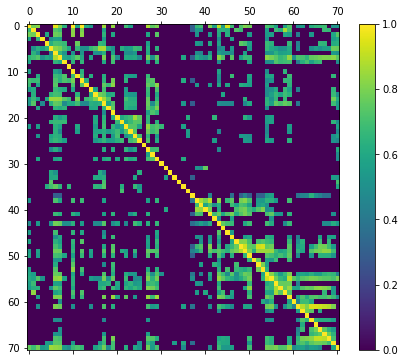

In [37]:
fig = plt.figure(figsize=(7,6))
ax = plt.subplot(111)
cax = ax.matshow(D_no_d, aspect='auto')
cbar = fig.colorbar(cax)
plt.show()